In [28]:
import pysptools.util as util
import pandas as pd
import matplotlib.pyplot as plt
from spectral import *
import numpy as np
import pysptools.eea as eea
import spectral.io.envi as envi
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import pysptools.classification as cls
import pysptools.noise as ns
import pysptools.skl as skl
import timeit

data_file = r'C:\Users\Dr.RSK\Desktop\Hyperspectral-CNN\AlisoCanyon1\aliso1.hdr'
data, header = util.load_ENVI_file(data_file)

In [9]:
data.shape

(5120, 512, 256)

In [22]:
print(data)

[[[6.30456   6.47104   6.44008   ... 7.1713943 7.226754  7.367842 ]
  [6.366256  6.382112  6.322816  ... 7.3618956 7.1772556 7.524872 ]
  [6.238192  6.3524    6.441248  ... 7.329453  7.579053  7.557485 ]
  ...
  [6.20264   6.237568  6.202608  ... 7.302095  7.242063  7.3557906]
  [6.270048  6.339232  6.1888    ... 7.4885545 7.6951466 7.3430185]
  [6.319312  6.443088  6.259568  ... 7.338101  7.597749  7.507829 ]]

 [[6.173552  6.420736  6.41464   ... 7.2850213 7.2767653 7.346205 ]
  [6.210048  6.366032  6.41104   ... 7.307389  7.3564444 7.325917 ]
  [6.254368  6.328432  6.487248  ... 7.5155478 7.5258193 7.3589396]
  ...
  [6.265744  6.263936  6.270416  ... 7.3813105 7.4708467 7.3175025]
  [6.206     6.366848  6.247792  ... 7.3420134 7.5150695 7.460285 ]
  [6.319312  6.376576  6.268752  ... 7.2920804 7.500849  7.5953126]]

 [[6.173552  6.420736  6.5164    ... 7.3387737 7.4408855 7.096118 ]
  [6.341584  6.422304  6.427088  ... 7.318991  7.2245274 7.1944795]
  [6.327152  6.50416   6.525584 

In [24]:
print(header)

{'description': 'File imported into ENVI.', 'samples': '512', 'lines': '5120', 'bands': '256', 'header offset': '0', 'file type': 'ENVI Standard', 'data type': '4', 'interleave': 'bip', 'sensor type': 'Unknown', 'byte order': '0', 'wavelength units': 'Micrometers', 'wavelength': ['7.519890', '7.537630', '7.555470', '7.573220', '7.591070', '7.608820', '7.626670', '7.644420', '7.662280', '7.680040', '7.697900', '7.715660', '7.733530', '7.751300', '7.769170', '7.786950', '7.804830', '7.822610', '7.840390', '7.858280', '7.876070', '7.893960', '7.911750', '7.929650', '7.947440', '7.965350', '7.983150', '8.001050', '8.018860', '8.036760', '8.054570', '8.072480', '8.090290', '8.108200', '8.126020', '8.143830', '8.161740', '8.179550', '8.197460', '8.215270', '8.233190', '8.250990', '8.268900', '8.286700', '8.304610', '8.322410', '8.340300', '8.358100', '8.375990', '8.393770', '8.411650', '8.429430', '8.447200', '8.465060', '8.482820', '8.500670', '8.518420', '8.536250', '8.553980', '8.571800',

In [26]:
def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return result

In [27]:
def remove_bands(X,Y):
    mask = list(range(X, Y))
    REM_ARRAY = np.delete(data, mask, 2)
    return REM_ARRAY

Endmembers extraction with NFINDR


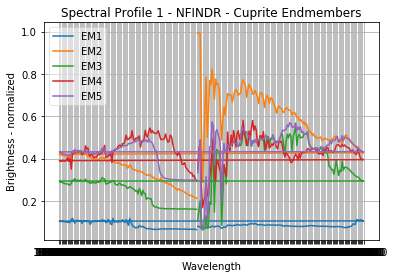

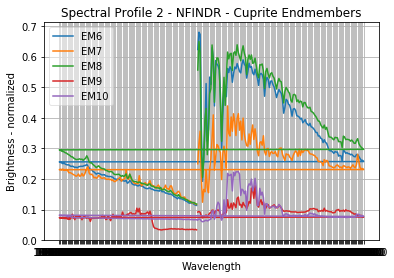

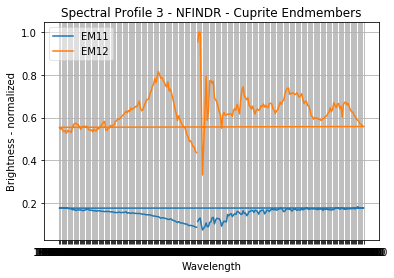

array([[0.07948477, 0.07968642, 0.07540762, ..., 0.06639823, 0.06545115,
        0.0643583 ],
       [0.99222237, 0.99708277, 0.9905449 , ..., 0.21827629, 0.21587656,
        0.21222582],
       [0.11003944, 0.15716329, 0.19988227, ..., 0.16132633, 0.16097286,
        0.15994067],
       ...,
       [0.06606779, 0.06889973, 0.06837496, ..., 0.06680074, 0.06743909,
        0.06674054],
       [0.11355531, 0.12387968, 0.12967163, ..., 0.09077799, 0.08766146,
        0.08643103],
       [0.9558562 , 0.99945474, 1.        , ..., 0.4628884 , 0.44264418,
        0.43604046]], dtype=float32)

In [25]:
def get_endmembers_nfindr(data, header):
    print('Endmembers extraction with NFINDR')
    nfindr = eea.NFINDR()
    U = nfindr.extract(data, 12, maxit=5, normalize=True, ATGP_init=True)
    nfindr.display(header, suffix='Cuprite Endmembers')
    return U
get_endmembers_nfindr(data,header)

In [23]:
del_arr = []

for i in range(0,10):
    del_arr.append(i)
print(del_arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
before_cut = data

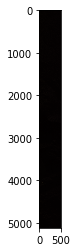

In [18]:
view = imshow(before_cut, (29, 19, 9))

In [19]:
after_cut = np.delete(before_cut,del_arr,0)

In [20]:
after_cut.shape

(2620, 512, 256)

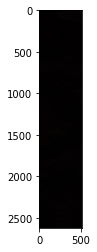

In [21]:
view = imshow(after_cut, (29, 19, 9))

In [35]:
np.save('cutarray.npy',after_cut)

In [36]:
loaded_cut = np.load('cutarray.npy')

In [37]:
loaded_cut.shape

(149, 190, 224)